In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
import mapclassify
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
import string
from matplotlib.collections import PatchCollection

In [94]:
#set figure/legend/font sizes
plt.rcParams.keys()
#xtick/ytick 16 for 2 panel; 24 for 4 panel
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'axes.titlepad': 2,
          'xtick.labelsize': 24,
         'ytick.labelsize': 24,
         'legend.title_fontsize':20,
         'legend.fontsize':16}
plt.rcParams.update(params)

In [3]:
states= gpd.read_file(r'/blue/emullens/meirahwilliamson/Shapefiles/US_States/cb_2018_us_state_20m.shp')
states= states[(states['NAME']!='Alaska') & (states['NAME']!='Hawaii') & (states['NAME']!='Puerto Rico')]
states= states[(states['NAME']== 'California') | (states['NAME']== 'Nevada') | (states['NAME']== 'Arizona')
               | (states['NAME']== 'Utah') | (states['NAME']== 'Colorado') | (states['NAME']== 'New Mexico')]
states= states.to_crs(4326)

counties=gpd.read_file(r'/blue/emullens/meirahwilliamson/Shapefiles/US_Counties/US_Counties.shp')
counties= counties.to_crs(4326)


damaged_counties=gpd.read_file(r'/blue/emullens/meirahwilliamson/missed_StormData/missed_individual/missed_individual.shp')
dc= damaged_counties.to_crs(4326)

x_meters=[-125,-115,-105]  
y_meters=[35,40]

x_latlon_str=['35\N{DEGREE SIGN}N','40\N{DEGREE SIGN}N']
y_latlon_str=['125\N{DEGREE SIGN}W','115\N{DEGREE SIGN}W','105\N{DEGREE SIGN}W'] 

In [114]:
#aug
f_aug2017= r'/orange/emullens/MEIRAH/STAGEIV_regrid_2017_Aug_1hr_Meirah.nc'
stageiv_aug2017= xr.open_dataset(f_aug2017)

filename_aug2017=r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2017080312_e2017080412_vhr09_240000L_20170804_120000V_pairs.nc'
#filename_aug2017=r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2017081212_e2017081312_vhr09_240000L_20170813_120000V_pairs.nc'

OBS_aug2017_read=xr.open_dataset(filename_aug2017)

dc_aug2017=dc[(dc['date']==20170803)]# & (dc['NAME']!='Berkshire')]

#jul
f_jul2018= r'/orange/emullens/MEIRAH/STAGEIV_regrid_2018_Jul_1hr_Meirah.nc'
stageiv_jul2018= xr.open_dataset(f_jul2018)

filename_jul2018=r'/blue/emullens/meirahwilliamson/netcdf_ero_cleaned/jja/grid_stat_ALL_ERO_s2018071212_e2018071312_vhr09_240000L_20180713_120000V_pairs.nc'
OBS_jul2018_read=xr.open_dataset(filename_jul2018)

dc_jul2018=dc[(dc['date']==20180712) & (dc['NAME']!='Kanabec')]

In [119]:
dc[(dc['date']==20170803)]

,GEOID,NAME,Shape_Leng,Shape_Area,Unnamed_ 0,date,property_d,month,flood_caus,season,episode_id,episode_na,geometry
350,04012,La Paz,5.333963,1.136103,800.0,20170803.0,4000.0,8.0,Heavy Rain,jja,118567.0,Isolated to scattered showers and thunderstorm...,"POLYGON ((-114.72528 33.40505, -114.67390 33.4..."
351,04013,Maricopa,7.726430,2.311831,801.0,20170803.0,15000.0,8.0,Heavy Rain,jja,118215.0,Scattered to numerous monsoon thunderstorms de...,"POLYGON ((-113.33392 33.37743, -113.33333 33.5..."
352,06025,Imperial,4.832581,1.114632,803.0,20170803.0,10000.0,8.0,Heavy Rain,jja,118939.0,Scattered monsoon thunderstorms developed duri...,"POLYGON ((-116.10563 32.72157, -116.08109 33.0..."
353,06071,San Bernardino,10.132993,5.133028,804.0,20170803.0,6000.0,8.0,Heavy Rain,jja,119016.0,A push of monsoon moisture fueled an outbreak ...,"POLYGON ((-117.80254 33.97555, -117.76775 34.0..."
354,49055,Wayne,4.471045,0.655856,808.0,20170803.0,2000.0,8.0,Heavy Rain,jja,119971.0,A moist airmass across Utah in the first week ...,"POLYGON ((-111.84876 38.42493, -111.76639 38.5..."
355,35041,Roosevelt,3.871905,0.620049,807.0,20170803.0,2400000.0,8.0,Heavy Rain,jja,117328.0,The center of upper level high pressure shifte...,"POLYGON ((-103.94878 34.60506, -103.73817 34.6..."


In [124]:
lat_plot = stageiv_aug2017.variables['lat'][150:360]
lon_plot = stageiv_aug2017.variables['lon'][50:450]
lat_plot_OBS = OBS_aug2017_read.variables['lat'][65:178]
lon_plot_OBS = OBS_aug2017_read.variables['lon'][50:304]

time_aug2017= stageiv_aug2017.variables['precip_accumulation'][60:83,150:360,50:450]
time_jul2018= stageiv_jul2018.variables['precip_accumulation'][276:299,150:360,50:450]
aug2017_24hr= time_aug2017.sum(dim='time', skipna=True)
jul2018_24hr= time_jul2018.sum(dim='time', skipna=True)

OBS_aug2017= OBS_aug2017_read.variables['OBS_ALL_A365324_FULL_MAX_49'][65:178,50:304]
OBS_jul2018= OBS_jul2018_read.variables['OBS_ALL_A365324_FULL_MAX_49'][65:178,50:304]

ERO_aug2017= OBS_aug2017_read.variables['FCST_ERO_Surface_FULL'][65:178,50:304]
ERO_jul2018= OBS_jul2018_read.variables['FCST_ERO_Surface_FULL'][65:178,50:304]

In [125]:
ls_aug2017= []
ls_jul2018= []
for i,j in zip(aug2017_24hr, jul2018_24hr):
    for k,m in zip(i,j):
        if k>0:
            ls_aug2017.append(k)
        if m>0:
            ls_jul2018.append(m)
            
print(min(ls_aug2017), aug2017_24hr.max())
print(min(ls_jul2018), jul2018_24hr.max())

<xarray.Variable ()>
array(8.117522e-06, dtype=float32) <xarray.Variable ()>
array(74.11641, dtype=float32)
<xarray.Variable ()>
array(1.1073197e-05, dtype=float32) <xarray.Variable ()>
array(59.518513, dtype=float32)


In [126]:
min_nz_aug2017= min(ls_aug2017)
min_nz_jul2018= min(ls_jul2018)

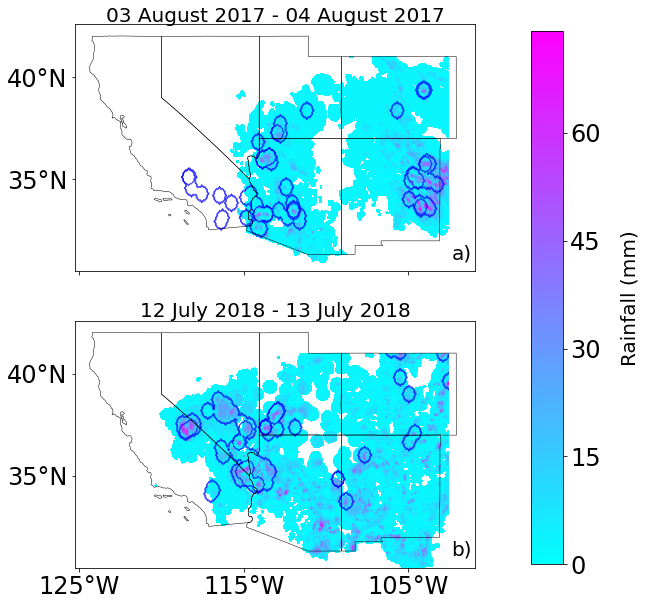

In [141]:
fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(18,10),sharey=True,sharex=True)

for ax,label,title in zip(axes.flat,['a)', 'b)'],['03 August 2017 - 04 August 2017', '12 July 2018 - 13 July 2018']):
    
    ax.set_title(title)
    ax.set_xticks(x_meters)
    ax.set_xticklabels(y_latlon_str)
    ax.set_yticks(y_meters)
    ax.set_yticklabels(x_latlon_str)    
    
    levels_aug2017=np.linspace(min_nz_aug2017, aug2017_24hr.max(), 15)
    levels_jul2018=np.linspace(min_nz_jul2018, jul2018_24hr.max(), 15)
    
    if label== 'a)':
        ax.contourf(lon_plot, lat_plot, aug2017_24hr, levels= levels_aug2017, cmap= 'cool')     
        ax.contour(lon_plot_OBS, lat_plot_OBS, OBS_aug2017, colors=['blue'], linewidths=0.5)
        #ax.contourf(lon_plot_OBS, lat_plot_OBS, ERO_aug2017, colors=['white','black','black','black'],alpha=0.2, linewidths=0.5)

        #dc_aug2017.plot(ax=ax, color='none',edgecolor='black',linewidth=0.5,zorder=1)
        
    if label== 'b)':
        ax.contourf(lon_plot, lat_plot, jul2018_24hr, levels= levels_jul2018, cmap= 'cool')
        ax.contour(lon_plot_OBS, lat_plot_OBS, OBS_jul2018, colors=['blue'], linewidths=0.5)
        #ax.contourf(lon_plot_OBS, lat_plot_OBS, ERO_jul2018, colors=['white','black','black','black'], linewidths=0.5,alpha=0.2)

        #dc_jul2018.plot(ax=ax, color='none',edgecolor='black',linewidth=0.5,zorder=1)


    states.plot(ax=ax, color='none',edgecolor='black',linewidth=0.5,zorder=2)
    ax.text(0.94, 0.11, label, transform=ax.transAxes,
          fontsize=20, va='top')

cax= fig.add_axes([0.71,0.13,0.025,0.74])    
norm = mpl.colors.Normalize(vmin=0, vmax=aug2017_24hr.max())
cb= fig.colorbar(cm.ScalarMappable(cmap='cool',norm=norm),cax=cax, ticks=[0,15,30,45,60,75])
cb.set_label('Rainfall (mm)', labelpad=20)

fig.savefig(r'/blue/emullens/meirahwilliamson/figures/supp.png', dpi=300, bbox_inches='tight')

In [79]:
dc[dc['episode_na'].str.contains('monsoon')][0:50].sort_values('date')

,GEOID,NAME,Shape_Leng,Shape_Area,Unnamed_ 0,date,property_d,month,flood_caus,season,episode_id,episode_na,geometry
333,06071,San Bernardino,10.132993,5.133028,593.0,20170708.0,2000.0,7.0,Heavy Rain,jja,117598.0,The season's first push of monsoon moisture br...,"POLYGON ((-117.80254 33.97555, -117.76775 34.0..."
257,06027,Inyo,8.153804,2.669609,600.0,20170710.0,5000.0,7.0,Heavy Rain,jja,117598.0,The season's first push of monsoon moisture br...,"POLYGON ((-118.77501 37.46305, -117.83350 37.4..."
150,04013,Maricopa,7.726430,2.311831,639.0,20170715.0,15000.0,7.0,Heavy Rain,jja,117857.0,Scattered monsoon thunderstorms developed duri...,"POLYGON ((-113.33392 33.37743, -113.33333 33.5..."
133,04013,Maricopa,7.726430,2.311831,658.0,20170718.0,10000.0,7.0,Heavy Rain,jja,117918.0,Scattered monsoon thunderstorms developed acro...,"POLYGON ((-113.33392 33.37743, -113.33333 33.5..."
198,06071,San Bernardino,10.132993,5.133028,727.0,20170724.0,8020000.0,7.0,Heavy Rain,jja,118034.0,A big push of monsoon moisture fueled an outbr...,"POLYGON ((-117.80254 33.97555, -117.76775 34.0..."
19,04015,Mohave,9.459388,3.472967,741.0,20170725.0,111000.0,7.0,Heavy Rain,jja,118033.0,A big push of monsoon moisture fueled an outbr...,"POLYGON ((-114.74334 36.07053, -114.73617 36.1..."
18,06071,San Bernardino,10.132993,5.133028,742.0,20170725.0,1000.0,7.0,Heavy Rain,jja,118034.0,A big push of monsoon moisture fueled an outbr...,"POLYGON ((-117.80254 33.97555, -117.76775 34.0..."
190,32017,Lincoln,7.360593,2.814466,757.0,20170726.0,20000.0,7.0,Heavy Rain,jja,118035.0,A big push of monsoon moisture fueled an outbr...,"POLYGON ((-115.89386 38.05053, -115.00085 38.0..."
111,06071,San Bernardino,10.132993,5.133028,784.0,20170729.0,30000.0,7.0,Heavy Rain,jja,118162.0,Scattered monsoon thunderstorms developed acro...,"POLYGON ((-117.80254 33.97555, -117.76775 34.0..."
58,06065,Riverside,7.615391,1.841390,787.0,20170801.0,31000.0,8.0,Heavy Rain,jja,119943.0,The month began with a ridge of high pressure ...,"POLYGON ((-117.67313 33.87100, -117.65538 33.9..."
